In [1]:
import pandas as pd

# Importing the Loan book


In [2]:
df1=pd.read_excel(r'C:/Users/Shreejayanthi.s/OneDrive - PKF Sridhar & Santhanam LLP/Trunkated Loan book - April.xlsx')
df2=pd.read_excel(r'C:/Users/Shreejayanthi.s/OneDrive - PKF Sridhar & Santhanam LLP/Trunkated Loan book - May.xlsx')
df3=pd.read_excel(r'C:/Users/Shreejayanthi.s/OneDrive - PKF Sridhar & Santhanam LLP/Trunkated Loan book - June.xlsx')

Consolidating the Loan book

In [3]:
dff=pd.concat([df1,df2,df3])

In [4]:
print(dff.columns)

Index(['Month', 'region', 'branch_name', 'URN', 'AccountNumber',
       'Revised Ownership tagging after additional write off did in Mar 2023 post Apr 23 MIS closure',
       'Product', 'DisbursementDate', 'Disbursement ', 'Interest_Rate',
       'Prin_OS', 'Principal_Collected_for_the_period',
       'Interest_Collected_for_the_period',
       'Regular_Interest_Income_for_the_period', 'Overdue_Days',
       'Installment_Amount', 'Stage', 'EMI paid', 'Ownership', 'emi_paid'],
      dtype='object')


# Extracting the data required using Pivot



In [5]:
# Pivot the data
pivot_df = dff.pivot_table(index=['AccountNumber','region','Product','branch_name'],
                           columns=['Month'],
                           values=['Prin_OS','Disbursement ','Overdue_Days',],
                           aggfunc={'Prin_OS':'sum','Disbursement ': 'sum', 'Overdue_Days' : 'sum'})


In [6]:
# Flatten the MultiIndex columns
pivot_df.columns = [' '.join(col).strip() for col in pivot_df.columns.values]


In [7]:
# Reset index for better formatting (optional)
pivot_df.reset_index(inplace=True)

# Inserting OD bucket Column

Categorizing the OD days into 3 buckets (0+, 30+ and 90+)

In [9]:
def categorize_overdue(days):
    if days <= 30:
        return '0+'
    elif days <= 90:
        return '30+'
    else:
        return '90+'

# Apply the function to the 'Overdue_Days' values for Apr, May, and June
pivot_df[('Overdue_Bucket_Apr')] = pivot_df['Overdue_Days Apr'].apply(categorize_overdue)
pivot_df[('Overdue_Bucket_May')] = pivot_df['Overdue_Days May'].apply(categorize_overdue)
pivot_df[('Overdue_Bucket_Jun')] = pivot_df['Overdue_Days June'].apply(categorize_overdue)

# Print the updated DataFrame
print(pivot_df)


           AccountNumber       region             Product   branch_name  \
0       0001010000032698        BIHAR            JLG Loan    PATNA MAIN   
1       0001010000070757        BIHAR            JLG Loan    PATNA MAIN   
2       0001010000070761        BIHAR            JLG Loan    PATNA MAIN   
3       0001010000070763        BIHAR            JLG Loan    PATNA MAIN   
4       0001010000070764        BIHAR            JLG Loan    PATNA MAIN   
...                  ...          ...                 ...           ...   
739161  IR/2097060715927  KRISHNAGIRI  JLG Loan - Axis BC  ULLAGURUKKAI   
739162  IR/2097060715931  KRISHNAGIRI  JLG Loan - Axis BC  ULLAGURUKKAI   
739163  IR/2097060716716  KRISHNAGIRI  JLG Loan - Axis BC        ULAGAM   
739164  IR/2097060716717  KRISHNAGIRI  JLG Loan - Axis BC        ULAGAM   
739165  IR/2097060716718  KRISHNAGIRI  JLG Loan - Axis BC        ULAGAM   

        Disbursement  Apr  Disbursement  June  Disbursement  May  \
0                     0.0      

In [10]:
print(pivot_df.columns)


Index(['AccountNumber', 'region', 'Product', 'branch_name',
       'Disbursement  Apr', 'Disbursement  June', 'Disbursement  May',
       'Overdue_Days Apr', 'Overdue_Days June', 'Overdue_Days May',
       'Prin_OS Apr', 'Prin_OS June', 'Prin_OS May', 'Overdue_Bucket_Apr',
       'Overdue_Bucket_May', 'Overdue_Bucket_Jun'],
      dtype='object')


# Making a Pivot again from the summarized data separately for apr, may and june

In [11]:
import pandas as pd

# Assuming pivot_df is your DataFrame

pivot_table_april = pd.pivot_table(pivot_df, 
                             values='Prin_OS Apr',
                             index='region',
                             columns=('Overdue_Bucket_Apr'),
                             aggfunc='sum',
                             fill_value=0)

pivot_table_may = pd.pivot_table(pivot_df, 
                             values='Prin_OS May',
                             index='region',
                             columns=('Overdue_Bucket_May'),
                             aggfunc='sum',
                             fill_value=0)

pivot_table_june = pd.pivot_table(pivot_df, 
                             values='Prin_OS June',
                             index='region',
                             columns=('Overdue_Bucket_Jun'),
                             aggfunc='sum',
                             fill_value=0)



print(pivot_table_april)


Overdue_Bucket_Apr            0+          30+           90+
region                                                     
ARIYALUR            2.281006e+09  26794258.68  1.606139e+08
BIHAR               1.807546e+09   2765787.37  2.086903e+08
CG                  4.849712e+08   8295517.69  1.170412e+08
CHENNAI             4.372524e+08  16525447.53  9.146586e+07
HARYANA-HR          1.975493e+08   3190264.40  4.989198e+07
JHARKHAND           3.554943e+08   9769288.65  3.046197e+07
JHARKHAND-S         5.280531e+08    757429.80  9.924330e+07
KARNATAKA           1.280909e+09  12200563.79  1.243772e+08
KEONJHAR            2.125622e+09  51834646.35  2.102314e+08
KRISHNAGIRI         1.285739e+09   8032376.83  2.308343e+08
MADURAI             1.734171e+09  18797969.80  1.734251e+08
PUDHUKOTTAI         2.362195e+09  15118846.56  1.397555e+08
PUNJAB-PB           7.788705e+07    260626.00  8.606808e+07
THANJAVUR           1.455875e+09  32880339.83  2.207697e+08
UTTAR PRADESH       2.356305e+08    6596

# After arriving at 0+, 30+, 90+ (calculating % of respective region to total amt in that region in that bucket

In [12]:
import pandas as pd

# Assuming you have the existing pivot table as 'pivot_table'

# Calculate the sum of each overdue bucket in each region
sum_by_bucket = pivot_table_april.sum(axis=1)

# Calculate the percentage columns
pivot_table_april['(0+) %'] = pivot_table_april['0+'] / sum_by_bucket * 100
pivot_table_april['(30+) %'] =pivot_table_april['30+'] / sum_by_bucket * 100
pivot_table_april['(90+) %'] = pivot_table_april['90+'] / sum_by_bucket * 100

print(pivot_table_april)

# Calculate the percentage columns for May
pivot_table_may['(0+) %'] = pivot_table_may['0+'] / sum_by_bucket * 100
pivot_table_may['(30+) %'] = pivot_table_may['30+'] / sum_by_bucket * 100
pivot_table_may['(90+) %'] = pivot_table_may['90+'] / sum_by_bucket * 100

# Calculate the percentage columns for June
pivot_table_june['(0+) %'] = pivot_table_june['0+'] / sum_by_bucket * 100
pivot_table_june['(30+) %'] = pivot_table_june['30+'] / sum_by_bucket * 100
pivot_table_june['(90+) %'] = pivot_table_june['90+'] / sum_by_bucket * 100


Overdue_Bucket_Apr            0+          30+           90+     (0+) %  \
region                                                                   
ARIYALUR            2.281006e+09  26794258.68  1.606139e+08  92.407751   
BIHAR               1.807546e+09   2765787.37  2.086903e+08  89.526703   
CG                  4.849712e+08   8295517.69  1.170412e+08  79.463361   
CHENNAI             4.372524e+08  16525447.53  9.146586e+07  80.193938   
HARYANA-HR          1.975493e+08   3190264.40  4.989198e+07  78.820607   
JHARKHAND           3.554943e+08   9769288.65  3.046197e+07  89.833547   
JHARKHAND-S         5.280531e+08    757429.80  9.924330e+07  84.077683   
KARNATAKA           1.280909e+09  12200563.79  1.243772e+08  90.364801   
KEONJHAR            2.125622e+09  51834646.35  2.102314e+08  89.024274   
KRISHNAGIRI         1.285739e+09   8032376.83  2.308343e+08  84.332561   
MADURAI             1.734171e+09  18797969.80  1.734251e+08  90.021611   
PUDHUKOTTAI         2.362195e+09  1511

In [13]:
# List of columns for pivot_table
columns_to_pivot = ['Disbursement  Apr', 'Disbursement  June', 'Disbursement  May', 'Prin_OS Apr', 'Prin_OS May', 'Prin_OS June']

# Create the pivot table
pivot_table_disbursement = pd.pivot_table(pivot_df, 
                                          values=columns_to_pivot,
                                          index='region',
                                          aggfunc='sum',
                                          fill_value=0)

print(pivot_table_disbursement)


               Disbursement  Apr  Disbursement  June  Disbursement  May  \
region                                                                    
ARIYALUR               127375316           137539977          144806921   
BIHAR                  121616000           141644500          156511000   
CG                      29578203            39154885           30009968   
CHENNAI                 19572177            32114338           31902038   
HARYANA-HR              67030000            51635000           49680000   
JHARKHAND               31260041            24870300           32420197   
JHARKHAND-S             52910500            55513000           57643500   
KARNATAKA               80044257            86530939           86455408   
KEONJHAR               156657233            90704586          150421058   
KRISHNAGIRI             81223106            97881355           94738349   
MADURAI                101032111            91061206          132280779   
PUDHUKOTTAI            12

# Saving the output to excel

In [14]:
import pandas as pd

# Assuming you have the existing pivot_df DataFrame

# List of columns for pivot_table
columns_to_pivot = ['Disbursement  Apr', 'Disbursement  May', 'Disbursement  June',
                    'Prin_OS Apr', 'Prin_OS May', 'Prin_OS June']

# Create the pivot table
pivot_table = pd.pivot_table(pivot_df, 
                             values=columns_to_pivot,
                             index='region',
                             aggfunc='sum',
                             fill_value=0)

# Calculate the sum of disbursed and principal outstanding for each month
sum_disbursed = pivot_table[['Disbursement  Apr', 'Disbursement  May', 'Disbursement  June']].sum(axis=1)
sum_prin_os = pivot_table[['Prin_OS Apr', 'Prin_OS May', 'Prin_OS June']].sum(axis=1)

# Calculate the percentage disbursed and percentage principal outstanding for each month
pivot_table['% Disbursed April'] = (pivot_table['Disbursement  Apr'] / sum_disbursed) * 100
pivot_table['% Disbursed May'] = (pivot_table['Disbursement  May'] / sum_disbursed) * 100
pivot_table['% Disbursed June'] = (pivot_table['Disbursement  June'] / sum_disbursed) * 100
pivot_table['% Prin O/S April'] = (pivot_table['Prin_OS Apr'] / sum_prin_os) * 100
pivot_table['% Prin O/S May'] = (pivot_table['Prin_OS May'] / sum_prin_os) * 100
pivot_table['% Prin O/S June'] = (pivot_table['Prin_OS June'] / sum_prin_os) * 100

# Create a DataFrame with only the desired columns
output_columns = ['% Disbursed April', '% Disbursed May', '% Disbursed June', 
                  '% Prin O/S April', '% Prin O/S May', '% Prin O/S June']
output_df = pivot_table[output_columns]



In [15]:
import pandas as pd

# Assuming you have the existing pivot tables as 'pivot_table_april', 'pivot_table_may', and 'pivot_table_june'

# Create an Excel writer object
excel_writer = pd.ExcelWriter('pivot_tables.xlsx')

# Write each pivot table to a separate sheet
pivot_table_april.to_excel(excel_writer, sheet_name='April')
pivot_table_may.to_excel(excel_writer, sheet_name='May')
pivot_table_june.to_excel(excel_writer, sheet_name='June')
output_df.to_excel(excel_writer, sheet_name='Percentage Analysis')

# Save the Excel file
excel_writer.save()

print("Pivot tables exported to Excel.")

Pivot tables exported to Excel.


In [16]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


# Representation using Barchart

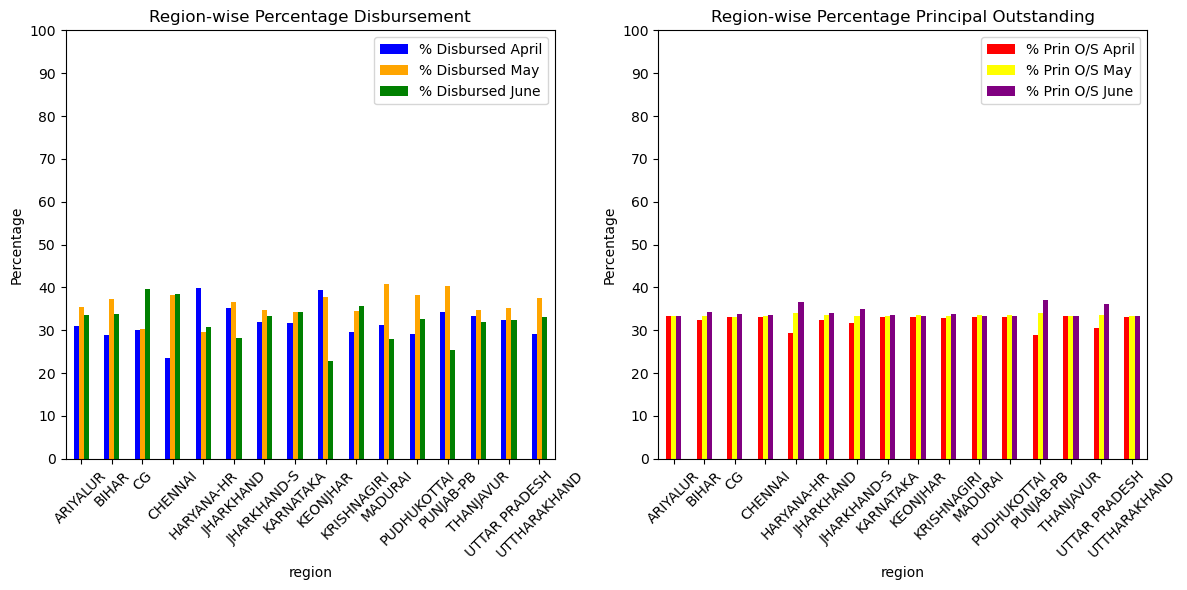

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the existing pivot_df DataFrame

# List of columns for pivot_table
columns_to_pivot = ['Disbursement  Apr', 'Disbursement  May', 'Disbursement  June',
                    'Prin_OS Apr', 'Prin_OS May', 'Prin_OS June']

# Create the pivot table
pivot_table = pd.pivot_table(pivot_df, 
                             values=columns_to_pivot,
                             index='region',
                             aggfunc='sum',
                             fill_value=0)

# Calculate the sum of disbursed and principal outstanding for each month
sum_disbursed = pivot_table[['Disbursement  Apr', 'Disbursement  May', 'Disbursement  June']].sum(axis=1)
sum_prin_os = pivot_table[['Prin_OS Apr', 'Prin_OS May', 'Prin_OS June']].sum(axis=1)

# Calculate the percentage disbursed and percentage principal outstanding for each month
pivot_table['% Disbursed April'] = (pivot_table['Disbursement  Apr'] / sum_disbursed) * 100
pivot_table['% Disbursed May'] = (pivot_table['Disbursement  May'] / sum_disbursed) * 100
pivot_table['% Disbursed June'] = (pivot_table['Disbursement  June'] / sum_disbursed) * 100
pivot_table['% Prin O/S April'] = (pivot_table['Prin_OS Apr'] / sum_prin_os) * 100
pivot_table['% Prin O/S May'] = (pivot_table['Prin_OS May'] / sum_prin_os) * 100
pivot_table['% Prin O/S June'] = (pivot_table['Prin_OS June'] / sum_prin_os) * 100

# Create a DataFrame with only the desired columns for Disbursement and Principal Outstanding
disbursement_columns = ['% Disbursed April', '% Disbursed May', '% Disbursed June']
prin_os_columns = ['% Prin O/S April', '% Prin O/S May', '% Prin O/S June']
disbursement_df = pivot_table[disbursement_columns]
prin_os_df = pivot_table[prin_os_columns]

# Create separate bar charts for Disbursement and Principal Outstanding
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
disbursement_df.plot(kind='bar', ax=plt.gca(), color=['blue', 'orange', 'green'])
plt.title("Region-wise Percentage Disbursement")
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.yticks(range(0, 101, 10))  # Adjust y-axis tick interval to 10

plt.subplot(1, 2, 2)
prin_os_df.plot(kind='bar', ax=plt.gca(), color=['red', 'yellow', 'purple'])
plt.title("Region-wise Percentage Principal Outstanding")
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.yticks(range(0, 101, 10))  # Adjust y-axis tick interval to 10

plt.tight_layout()

# Show the charts
plt.show()



# Representation using Pie chart

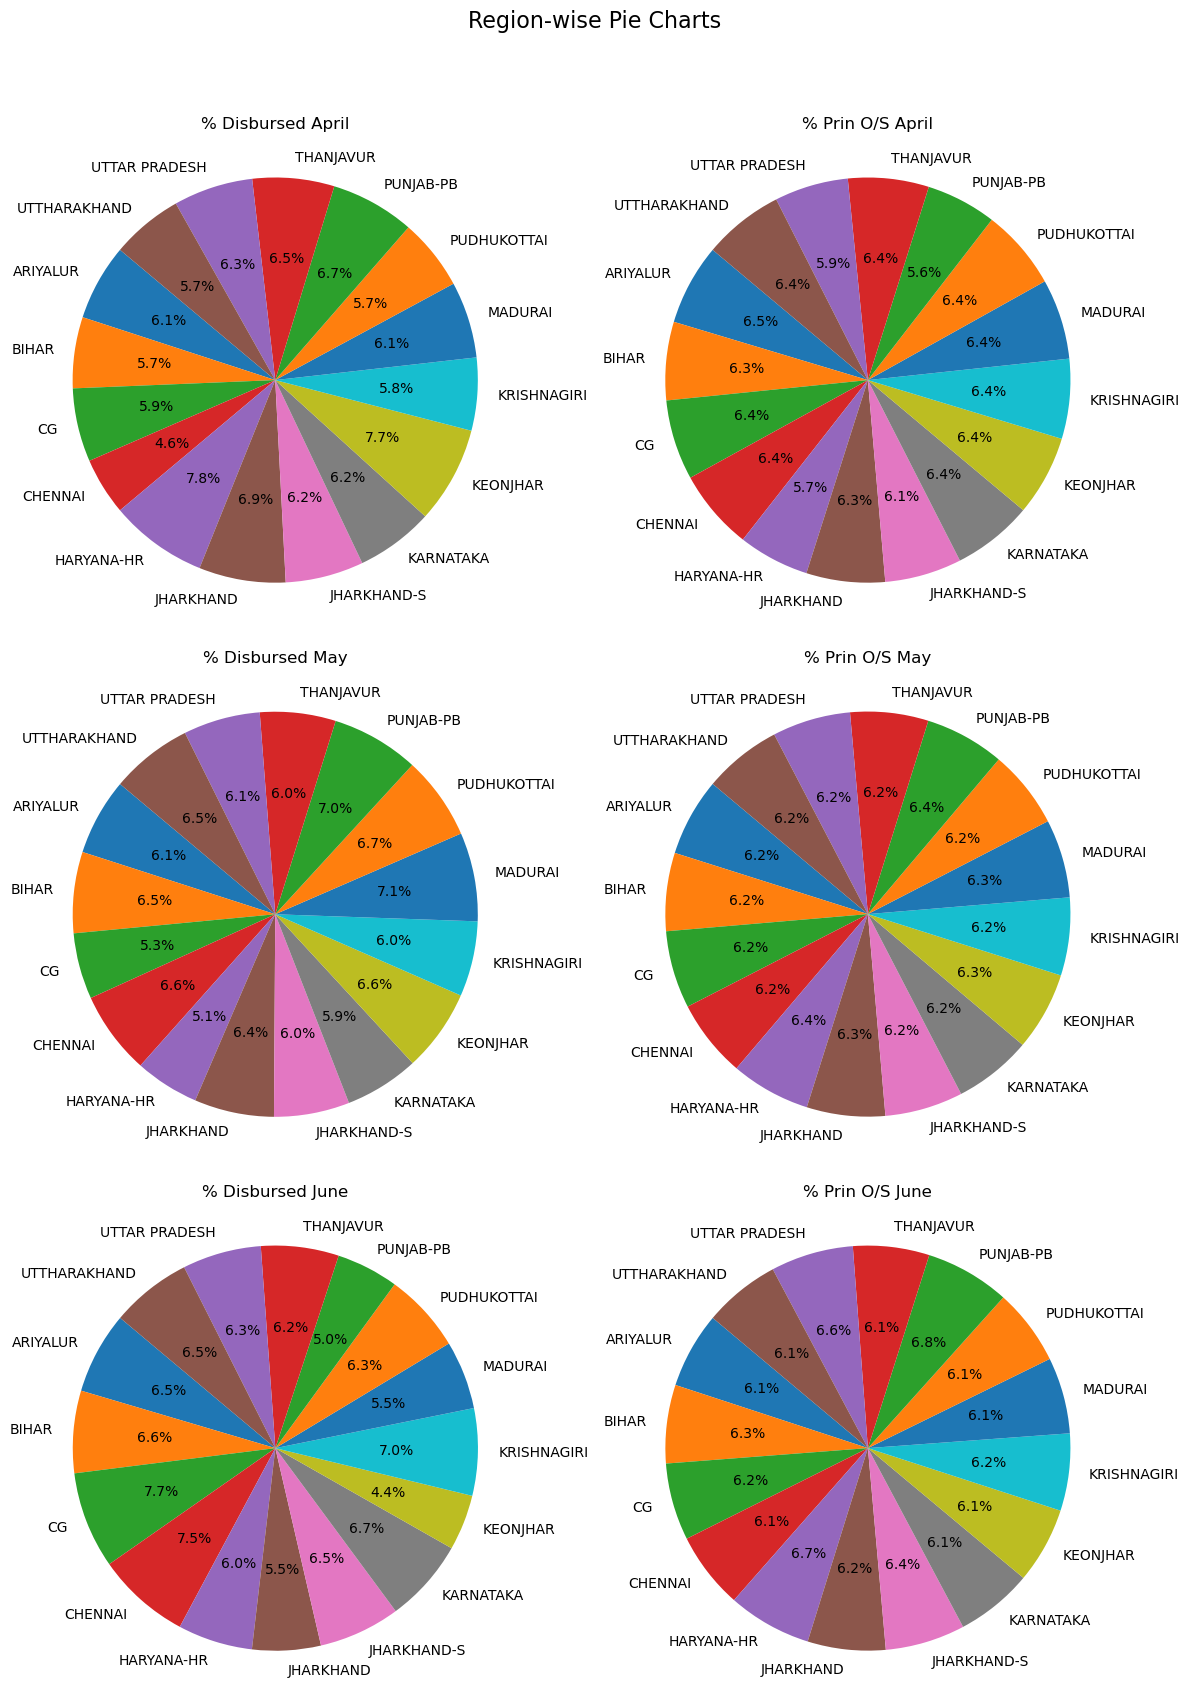

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the existing pivot_df DataFrame

# List of columns for pivot_table
columns_to_pivot = ['Disbursement  Apr', 'Disbursement  May', 'Disbursement  June',
                    'Prin_OS Apr', 'Prin_OS May', 'Prin_OS June']

# Create the pivot table
pivot_table = pd.pivot_table(pivot_df, 
                             values=columns_to_pivot,
                             index='region',
                             aggfunc='sum',
                             fill_value=0)

# Calculate the sum of disbursed and principal outstanding for each month
sum_disbursed = pivot_table[['Disbursement  Apr', 'Disbursement  May', 'Disbursement  June']].sum(axis=1)
sum_prin_os = pivot_table[['Prin_OS Apr', 'Prin_OS May', 'Prin_OS June']].sum(axis=1)

# Calculate the percentage disbursed and percentage principal outstanding for each month
pivot_table['% Disbursed April'] = (pivot_table['Disbursement  Apr'] / sum_disbursed) * 100
pivot_table['% Disbursed May'] = (pivot_table['Disbursement  May'] / sum_disbursed) * 100
pivot_table['% Disbursed June'] = (pivot_table['Disbursement  June'] / sum_disbursed) * 100
pivot_table['% Prin O/S April'] = (pivot_table['Prin_OS Apr'] / sum_prin_os) * 100
pivot_table['% Prin O/S May'] = (pivot_table['Prin_OS May'] / sum_prin_os) * 100
pivot_table['% Prin O/S June'] = (pivot_table['Prin_OS June'] / sum_prin_os) * 100

# Create a DataFrame with only the desired columns for pie charts
pie_columns = ['% Disbursed April', '% Prin O/S April','% Disbursed May',
               '% Prin O/S May','% Disbursed June','% Prin O/S June']
pie_data = pivot_table[pie_columns]

# Create subplots for 3x2 pie charts
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))
fig.suptitle('Region-wise Pie Charts', fontsize=16)

# Loop through each column and create a pie chart
for idx, column in enumerate(pie_data.columns):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]

    ax.pie(pie_data[column], labels=pie_data.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(column)
    ax.axis('equal')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the charts
plt.show()


# Conclusion drawn

From the above pie chart it is visible that each segment is contributing aroung 6% and 
In the above pie chart % of disbursement and % of prin o/s is compared segment wise every month
For E.g in the month of april, in chennai unit the disbursement is only (4.6%) of total disbursement but prin o/s is around (6.4%) .It indicates that the business is being slowly stopped there and they are moving towards other cities.
And also sameway it is clearly evident from the chart that they are expanding their business in haryana
Also in the month of june, it is seen that the company has made huge disbursements in chandigarh.

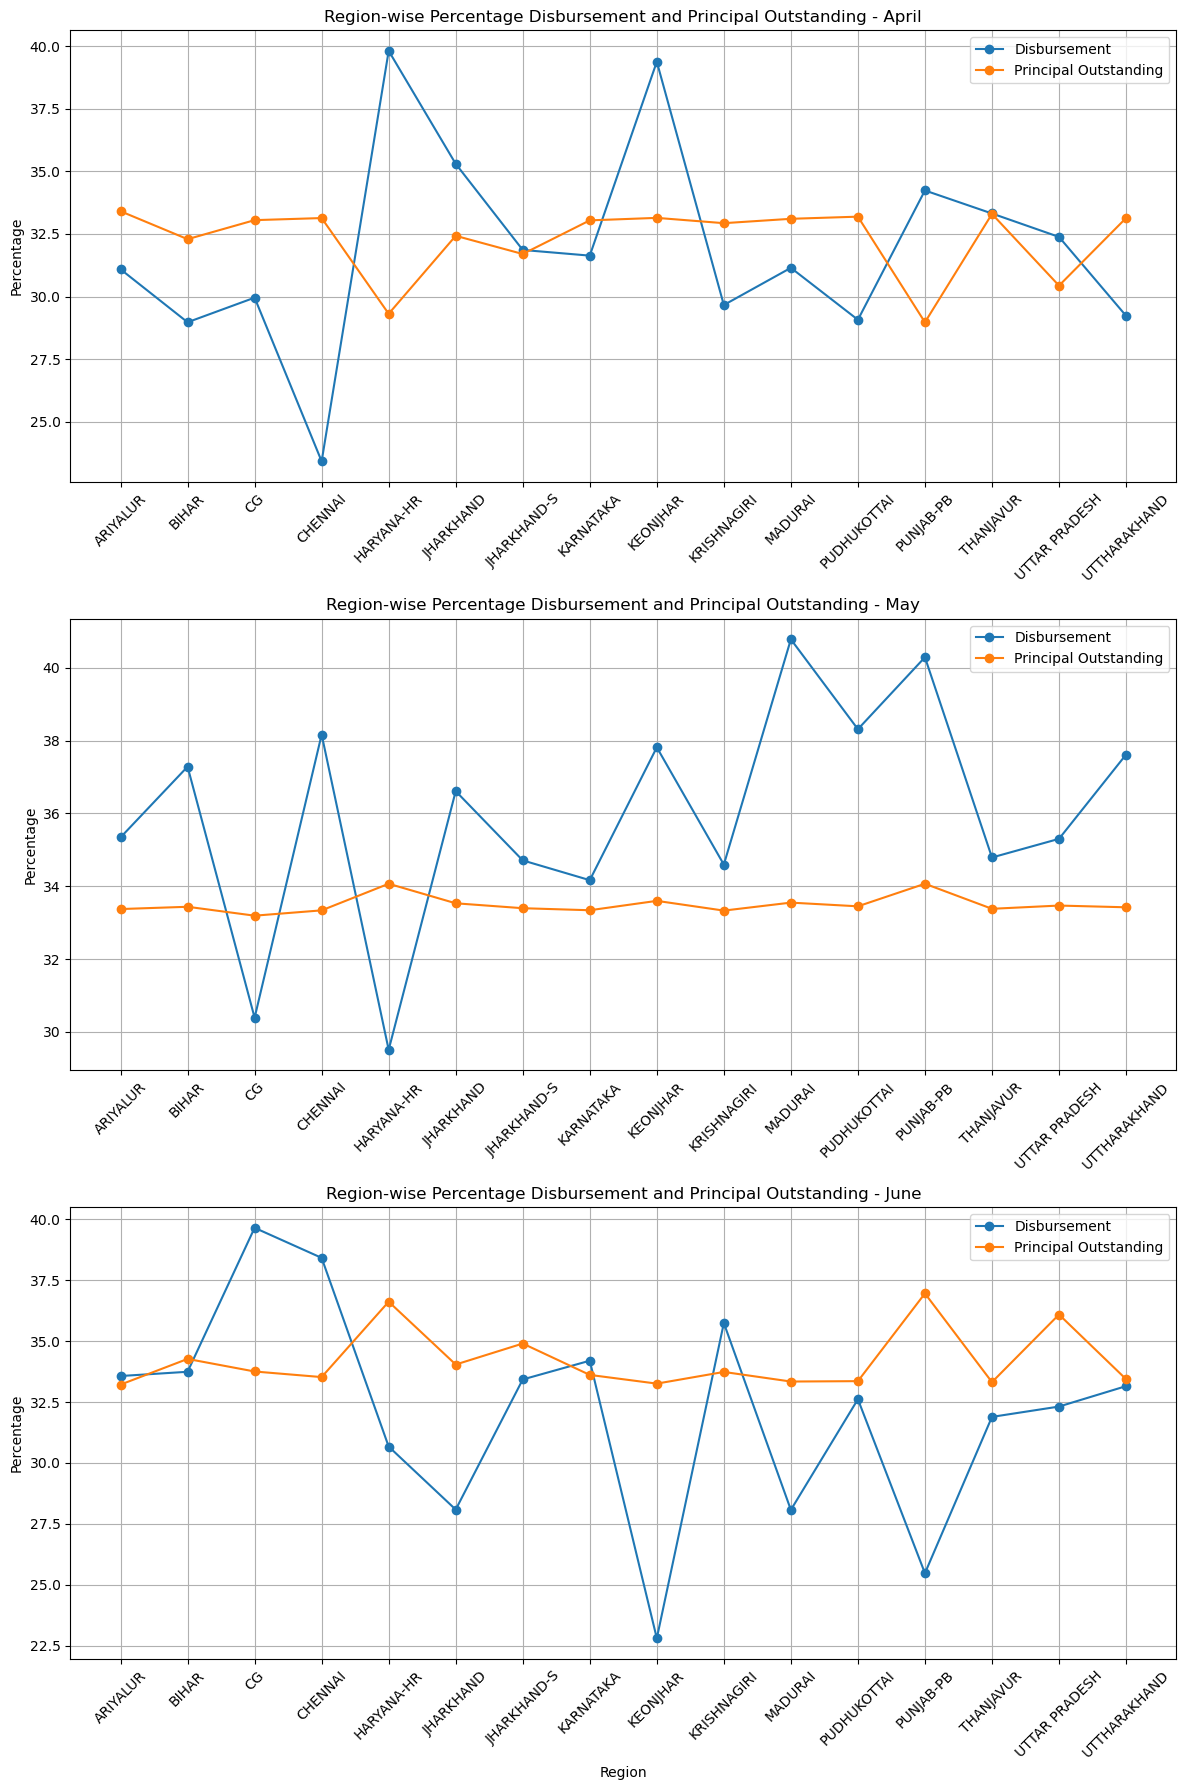

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the existing pivot_df DataFrame

# List of columns for pivot_table
columns_to_pivot = ['Disbursement  Apr', 'Disbursement  May', 'Disbursement  June',
                    'Prin_OS Apr', 'Prin_OS May', 'Prin_OS June']

# Create the pivot table
pivot_table = pd.pivot_table(pivot_df, 
                             values=columns_to_pivot,
                             index='region',
                             aggfunc='sum',
                             fill_value=0)

# Calculate the sum of disbursed and principal outstanding for each month
sum_disbursed = pivot_table[['Disbursement  Apr', 'Disbursement  May', 'Disbursement  June']].sum(axis=1)
sum_prin_os = pivot_table[['Prin_OS Apr', 'Prin_OS May', 'Prin_OS June']].sum(axis=1)

# Calculate the percentage disbursed and percentage principal outstanding for each month
pivot_table['% Disbursed April'] = (pivot_table['Disbursement  Apr'] / sum_disbursed) * 100
pivot_table['% Disbursed May'] = (pivot_table['Disbursement  May'] / sum_disbursed) * 100
pivot_table['% Disbursed June'] = (pivot_table['Disbursement  June'] / sum_disbursed) * 100
pivot_table['% Prin O/S April'] = (pivot_table['Prin_OS Apr'] / sum_prin_os) * 100
pivot_table['% Prin O/S May'] = (pivot_table['Prin_OS May'] / sum_prin_os) * 100
pivot_table['% Prin O/S June'] = (pivot_table['Prin_OS June'] / sum_prin_os) * 100

# Create DataFrames for Disbursement and Principal Outstanding percentages
disbursement_columns = ['% Disbursed April', '% Disbursed May', '% Disbursed June']
prin_os_columns = ['% Prin O/S April', '% Prin O/S May', '% Prin O/S June']
disbursement_df = pivot_table[disbursement_columns]
prin_os_df = pivot_table[prin_os_columns]

# Get the list of regions
regions = disbursement_df.index

# Create separate line charts for Disbursement and Principal Outstanding
plt.figure(figsize=(12, 18))

# Line chart for April Disbursement and Principal Outstanding
plt.subplot(3, 1, 1)
plt.plot(regions, disbursement_df['% Disbursed April'], marker='o', label='Disbursement')
plt.plot(regions, prin_os_df['% Prin O/S April'], marker='o', label='Principal Outstanding')
plt.title("Region-wise Percentage Disbursement and Principal Outstanding - April")
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Line chart for May Disbursement and Principal Outstanding
plt.subplot(3, 1, 2)
plt.plot(regions, disbursement_df['% Disbursed May'], marker='o', label='Disbursement')
plt.plot(regions, prin_os_df['% Prin O/S May'], marker='o', label='Principal Outstanding')
plt.title("Region-wise Percentage Disbursement and Principal Outstanding - May")
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Line chart for June Disbursement and Principal Outstanding
plt.subplot(3, 1, 3)
plt.plot(regions, disbursement_df['% Disbursed June'], marker='o', label='Disbursement')
plt.plot(regions, prin_os_df['% Prin O/S June'], marker='o', label='Principal Outstanding')
plt.title("Region-wise Percentage Disbursement and Principal Outstanding - June")
plt.ylabel('Percentage')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()

# Show the charts
plt.show()


# Conclusion

From the above line chart, we can easily identify the states where there is a huge difference between Disbursement and Prin o/s (%). It is similar to above pie chart but this give more clearer picture as it is plotted in line graph

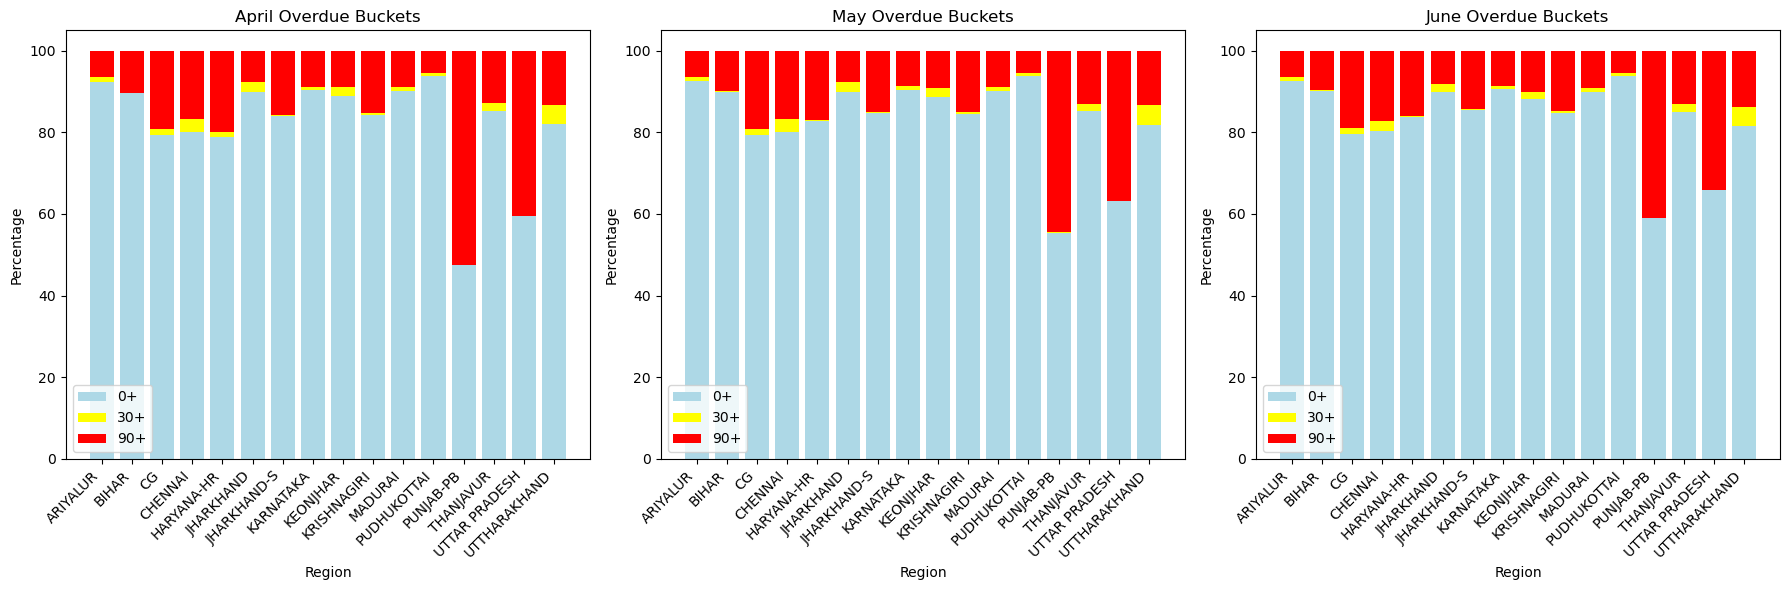

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the existing pivot tables as 'pivot_table_april', 'pivot_table_may', and 'pivot_table_june'

# Calculate the sum of each overdue bucket in each region for April, May, and June
sum_by_bucket_april = pivot_table_april.sum(axis=1)
sum_by_bucket_may = pivot_table_may.sum(axis=1)
sum_by_bucket_june = pivot_table_june.sum(axis=1)

# Calculate the percentage columns for April
pivot_table_april['(0+) %'] = pivot_table_april['0+'] / sum_by_bucket_april * 100
pivot_table_april['(30+) %'] = pivot_table_april['30+'] / sum_by_bucket_april * 100
pivot_table_april['(90+) %'] = pivot_table_april['90+'] / sum_by_bucket_april * 100

# Calculate the percentage columns for May
pivot_table_may['(0+) %'] = pivot_table_may['0+'] / sum_by_bucket_may * 100
pivot_table_may['(30+) %'] = pivot_table_may['30+'] / sum_by_bucket_may * 100
pivot_table_may['(90+) %'] = pivot_table_may['90+'] / sum_by_bucket_may * 100

# Calculate the percentage columns for June
pivot_table_june['(0+) %'] = pivot_table_june['0+'] / sum_by_bucket_june * 100
pivot_table_june['(30+) %'] = pivot_table_june['30+'] / sum_by_bucket_june * 100
pivot_table_june['(90+) %'] = pivot_table_june['90+'] / sum_by_bucket_june * 100

# Create a stacked bar chart for each region comparing overdue buckets percentages for April, May, and June
regions = pivot_table_april.index
x = range(len(regions))

plt.figure(figsize=(18, 6))  # Adjust figure size

# Stacked bar chart for April
plt.subplot(1, 3, 1)
plt.bar(x, pivot_table_april['(0+) %'], label='0+', color='lightblue')
plt.bar(x, pivot_table_april['(30+) %'], bottom=pivot_table_april['(0+) %'], label='30+', color='yellow')
plt.bar(x, pivot_table_april['(90+) %'], bottom=pivot_table_april['(30+) %'] + pivot_table_april['(0+) %'], label='90+', color='red')
plt.title("April Overdue Buckets")
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.xticks(x, regions, rotation=45, ha='right')  # Rotate and adjust alignment of x-axis labels
plt.legend()

# Stacked bar chart for May
plt.subplot(1, 3, 2)
plt.bar(x, pivot_table_may['(0+) %'], label='0+', color='lightblue')
plt.bar(x, pivot_table_may['(30+) %'], bottom=pivot_table_may['(0+) %'], label='30+', color='yellow')
plt.bar(x, pivot_table_may['(90+) %'], bottom=pivot_table_may['(30+) %'] + pivot_table_may['(0+) %'], label='90+', color='red')
plt.title("May Overdue Buckets")
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.xticks(x, regions, rotation=45, ha='right')  # Rotate and adjust alignment of x-axis labels
plt.legend()

# Stacked bar chart for June
plt.subplot(1, 3, 3)
plt.bar(x, pivot_table_june['(0+) %'], label='0+', color='lightblue')
plt.bar(x, pivot_table_june['(30+) %'], bottom=pivot_table_june['(0+) %'], label='30+', color='yellow')
plt.bar(x, pivot_table_june['(90+) %'], bottom=pivot_table_june['(30+) %'] + pivot_table_june['(0+) %'], label='90+', color='red')
plt.title("June Overdue Buckets")
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.xticks(x, regions, rotation=45, ha='right')  # Rotate and adjust alignment of x-axis labels
plt.legend()

plt.tight_layout()

# Show the charts
plt.show()


# Conclusion

The above chart shows region wise distribution of (0+), 30+ and 90+ buckets based on Prin o/s. Blue colour indicates 0+ , Yellow colour indicated (30+) and red colour indicates (90+), This can be compared monthly to identify whether there has been any significant slippage also this analysis helps us in identifying which region has most 90+ loans.